<a href="https://colab.research.google.com/github/VighneshAlevoor/ML-Feature-Engineering/blob/master/Feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Univariate Selection**

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Mobile Price Range Prediction Dataset.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [0]:
df = pd.read_csv('train.csv')
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [0]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [34]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)
featurescores=pd.concat([dfscores,dfcolumns],axis=1)
featurescores.columns=['scores','specs']
print(featurescores.nlargest(10, 'scores'))

           scores          specs
13  931267.519053            ram
11   17363.569536      px_height
0    14129.866576  battery_power
12    9810.586750       px_width
8       95.972863      mobile_wt
6       89.839124     int_memory
15      16.480319           sc_w
16      13.236400      talk_time
4       10.135166             fc
14       9.614878           sc_h



**2. Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [37]:
print(model.feature_importances_)

[0.05574639 0.01996508 0.03352484 0.02086968 0.03221421 0.02135936
 0.03880038 0.03457379 0.03653825 0.03439021 0.03433294 0.04957719
 0.04759964 0.37595817 0.03336636 0.03714496 0.04052119 0.01378445
 0.01794211 0.0217908 ]


In [38]:
features=pd.Series(model.feature_importances_, index=x.columns)
features

battery_power    0.055746
blue             0.019965
clock_speed      0.033525
dual_sim         0.020870
fc               0.032214
four_g           0.021359
int_memory       0.038800
m_dep            0.034574
mobile_wt        0.036538
n_cores          0.034390
pc               0.034333
px_height        0.049577
px_width         0.047600
ram              0.375958
sc_h             0.033366
sc_w             0.037145
talk_time        0.040521
three_g          0.013784
touch_screen     0.017942
wifi             0.021791
dtype: float64

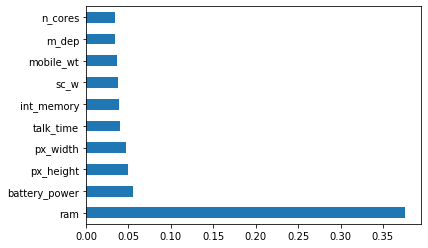

In [42]:
features=features.nlargest(10)
features.plot(kind='barh')

**3. Correlation Matrix with Heatmap**

Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

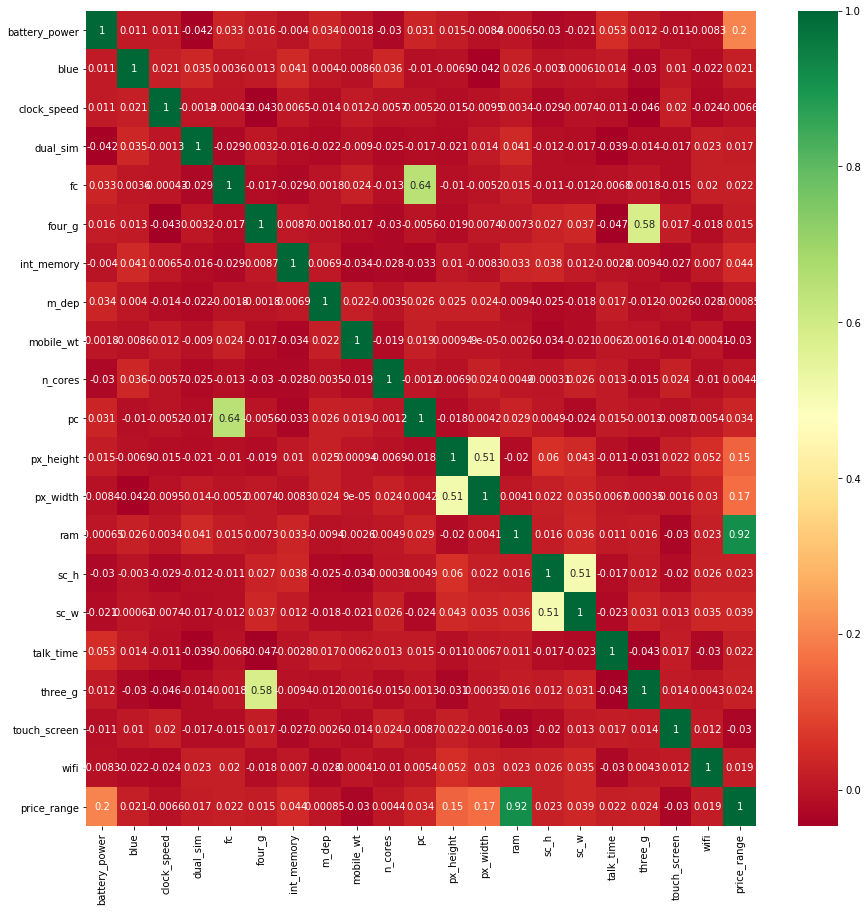

In [66]:
import seaborn as sns
#get correlations of each features in dataset
cor = df.corr()
top_corr_features = cor.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

